# Восстановление золота из руды

**Задача**

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Необходимо использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План проекта:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Описание данных**

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, необходимо проверить их на корректность.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Проверка-на-корректность" data-toc-modified-id="Проверка-на-корректность-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на корректность</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов" data-toc-modified-id="Концентрация-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-веществ" data-toc-modified-id="Суммарная-концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Тестирование модели</a>

## Подготовка данных

### Изучение данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('gold_recovery_train_new.csv')
test = pd.read_csv('gold_recovery_test_new.csv')
data = pd.read_csv('gold_recovery_full_new.csv')

#display (train.head(5), train.info())
#display (test.head(5), test.info())
display (data.head(5), data.info())
#display (train.info(), test.info(), data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


None

Нам даны 3 датасета: тренировочная выборка, тестовая выборка и исходные данные. Столбцы датасетов - различные параметры, которые характеризуют технологический процесс на разных этапах. Строки датасетов - единичные измерения параметров во времени.

**Из документации к данным нам известно:**

**Технологический процесс**
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  * Xanthate **— ксантогенат (промотер, или активатор флотации);
  * Sulphate — сульфат (на данном производстве сульфид натрия);
  * Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота


**Параметры этапов**
* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

**Наименование признаков**

`[этап].[тип_параметра].[название_параметра]`

**Возможные значения для блока `[этап]`:**
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

**Возможные значения для блока `[тип_параметра]`:**
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

**Задача:**

Смоделировать процесс восстановления золота из золотосодержащей руды.

### Проверка на корректность

Необходимо проверить, что эффективность обогащения расчитана правильно по формуле.

**Recovery = C * (F - T) / F * (C - T)**

In [6]:
recovery = train['rougher.output.recovery']
f = train['rougher.input.feed_au']
c = train['rougher.output.concentrate_au']
t = train['rougher.output.tail_au']

rec = (c * (f - t)) / (f * (c - t)) * 100
rec = pd.Series(rec)
rec.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [7]:
# найдем среднее абсолютное отклонение между расчетами
print (mean_absolute_error(recovery, my_recovery))

9.73512347450521e-15


Среднее отклонение близко к нулю, соответственно расчеты эффективности обогащения расчитаны правильно. 

### Анализ признаков

В тестовой и обучающей выборках разное количество столбцов, проверим, какие столбцы отсутствуют.

In [8]:
test_columns = list(test.columns)
train_columns = list(train.columns)

dif = [ i for i in train_columns if i not in test_columns]
display (len(dif), dif)

34

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке отсутсвуют параметры продукта, то есть отсутствует доля металлов в концентрате после флотации, первой очистки и финальный концентрат, также отсутсвует доля металлов в хвостах после всех этапов очистки, отсутствуют целевые признаки и некоторые расчетные характеристики.

Скорее всего промежуточные результаты нам неизвестны перед построением модели, поэтому их необходимо удалить из обучающей выборки. А целевые признаки нам необходимы, поэтому мы их добавим из исходного датасета в тестовую выборку, так как для предсказаний нам необходим целевой признак и одинаковое количество столбцов в выборках.

### Предобработка данных

Проанализируем информацию о данных для предобработки.

In [9]:
#train.info()
display (train.isna().sum().sort_values(ascending=False).head(10))
display (test.isna().sum().sort_values(ascending=False).head(10))
#train.head(5)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
dtype: int64

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.xanthate               4
primary_cleaner.input.sulfate                4
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
dtype: int64

* В данных есть один столбец с категориальным признаком - дата
* В данных есть пропуски

По описанию проекта, соседние по времени параметры часто похожи, поэтому можем заполнить попуски соседними значениями.

In [10]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
data = data.fillna(method='ffill')

**Вывод**

Данные изучены и обработаны, перед обучением модели необходимо провести повторную предобработку:
* проведена проверка на корректность целевого признака
* проанализированны признаки
  * необходимо удалить из тренировочной выборки доли концентрата
* данные обработаны
  * заполнены пропуски
  * необходимо удалить ненужные значения
  * необходимо провести стандартизацию
  
Далее необходимо проанализировать данные и построить модель.

## Анализ данных

### Концентрация металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [12]:
# переведем дату в нужный формат
data['date'] = pd.to_datetime(data['date'],format='%Y.%m.%d %H:%M:%S')

In [13]:
# выделим необходимые столбцы
au = data[['rougher.input.feed_au', 'rougher.output.concentrate_au', 
           'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au', 'date']]
ag = data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
           'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag', 'date']]
pb = data[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
           'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb', 'date']]

In [16]:
# создадим функцию, которая возвращает таблицы с долями металлов для графиков
def format(data, feed, router, prime, final):
    data = data.query('date.dt.year == 2017')
    data['date'] = data['date'].dt.date
    feed = data.groupby('date')[feed].mean()
    router = data.groupby('date')[router].mean()
    prime = data.groupby('date')[prime].mean()
    final = data.groupby('date')[final].mean()
    return feed, router, prime, final
           

feed_au, router_au, prime_au, final_au = format(au, 'rougher.input.feed_au', 'rougher.output.concentrate_au', 
                                                'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au')
feed_ag, router_ag, prime_ag, final_ag = format(ag, 'rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                                                'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag')
feed_pb, router_pb, prime_pb, final_pb = format(pb, 'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                                                'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb')

pd.options.mode.chained_assignment = None # default='warn'

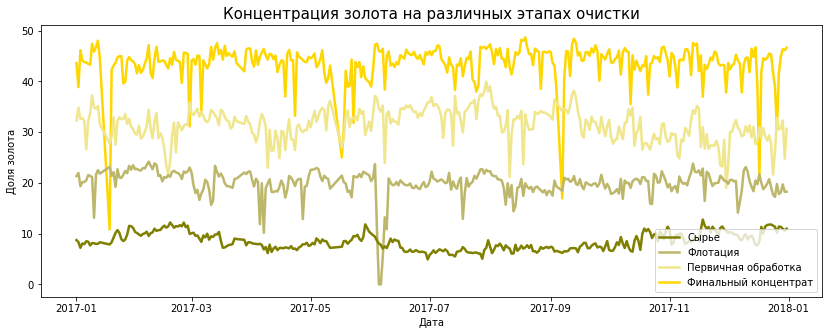

In [17]:
# построим график для концентрации золота
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()

final = ax.plot(final_au.index, final_au, c = 'gold', lw=2.5)
prime = ax.plot(prime_au.index, prime_au, c = 'khaki', lw=2.5)
router = ax.plot(router_au.index, router_au, c = 'darkkhaki', lw=2.5)
feed = ax.plot(feed_au.index, feed_au, c = 'olive', lw=2.5)

ax.set_title('Концентрация золота на различных этапах очистки', fontsize=15)
ax.set_xlabel('Дата')
ax.set_ylabel('Доля золота')

plt.legend((feed[0], router[0], prime[0], final[0]),(
    'Сырье', 'Флотация', 'Первичная обработка', 'Финальный концентрат'), loc = 'lower right')
plt.show()

Очистка золота происходит равномерно, с каждым этапом очистки доля золота в концентрате возрастает примерно на 10%, однако вторичная очистка нередко показывает видимое снижение доли золота в определенные дни, несмотря на то, что остальные этапы такого снижения в эти же дни не показывают.

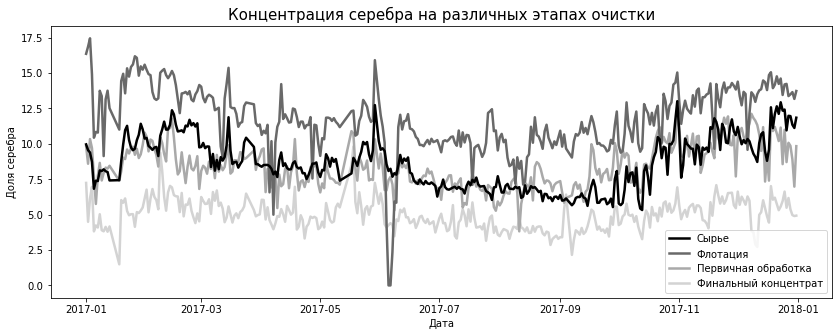

In [18]:
# построим график для концентрации серебра
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()

final = ax.plot(final_ag.index, final_ag, c = 'lightgray', lw=2.5)
prime = ax.plot(prime_ag.index, prime_ag, c = 'darkgray', lw=2.5)
router = ax.plot(router_ag.index, router_ag, c = 'dimgray', lw=2.5)
feed = ax.plot(feed_ag.index, feed_ag, c = 'black', lw=2.5)

ax.set_title('Концентрация серебра на различных этапах очистки', fontsize=15)
ax.set_xlabel('Дата')
ax.set_ylabel('Доля серебра')

plt.legend((feed[0], router[0], prime[0], final[0]),(
    'Сырье', 'Флотация', 'Первичная обработка', 'Финальный концентрат'), loc = 'lower right')
plt.show()

Очистка серебра показывает отрицательный рост, наибольшая доля серебра в сырье после флотации, однако следующие этапы (первичный и вторичный) сильно уменьшают его долю. Возможно, эти этапы фильтруют концентрат недостаточно эффективно и в хвостах после первичной и вторичной обработки остается достаточно большое количество серебра.

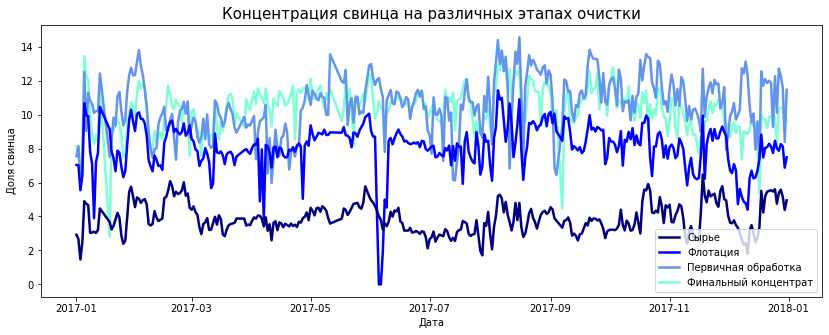

In [19]:
# построим график для концентрации свинца
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()

final = ax.plot(final_pb.index, final_pb, c = 'aquamarine', lw=2.5)
prime = ax.plot(prime_pb.index, prime_pb, c = 'cornflowerblue', lw=2.5)
router = ax.plot(router_pb.index, router_pb, c = 'b', lw=2.5)
feed = ax.plot(feed_pb.index, feed_pb, c = 'navy', lw=2.5)

ax.set_title('Концентрация свинца на различных этапах очистки', fontsize=15)
ax.set_xlabel('Дата')
ax.set_ylabel('Доля свинца')

plt.legend((feed[0], router[0], prime[0], final[0]), (
    'Сырье', 'Флотация', 'Первичная обработка', 'Финальный концентрат'), loc = 'lower right')
plt.show()

Очистка свинца происходит эффективнее, чем у серебра, доля свинца увеличивается почти в три раза, однако вторичная очистка почти не дает результат и доля свинца после нее не увеличивается. Возможно вторичная очистка недостаточно эффективная.

### Распределение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

<function matplotlib.pyplot.show(close=None, block=None)>

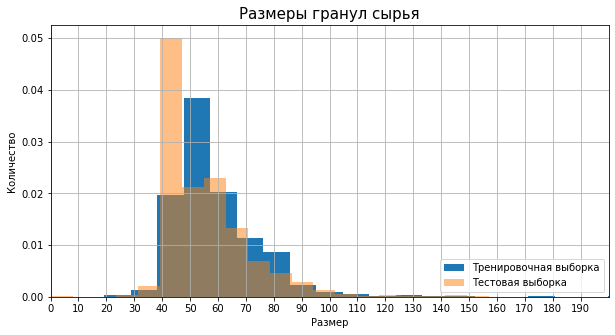

In [20]:
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

train['rougher.input.feed_size'].hist(bins=50, density=True)
test['rougher.input.feed_size'].hist(bins=50, density=True, alpha=0.5)

ax.set_title('Размеры гранул сырья', fontsize=15)
ax.set_xlabel('Размер')
ax.set_ylabel('Количество')
plt.legend(('Тренировочная выборка', 'Тестовая выборка'), loc = 'lower right')
              
ax.set_xlim(0, 200)
ax.set_xticks(np.arange(0, 200, 10))

plt.show

Как мы можем видеть на графике, распределения размеров гранул сырья примерно похожи, оба распределения нормальные и хвосты уходят вправо и влево, большинство значений находится в промежутке от 40 до 60 единиц.

### Суммарная концентрация веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [21]:
# суммируем концентрации
def consum(df):
    df['rougher.input.feed_sum'] = (df['rougher.input.feed_ag'] +  df['rougher.input.feed_au']
                                    + df['rougher.input.feed_pb'] + df['rougher.input.feed_sol'])
    df['rougher.output.concentrate_sum'] = (df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_au'] 
                                            + df['rougher.output.concentrate_pb'] + df['rougher.output.concentrate_sol'])
    df['primary_cleaner.output.concentrate_sum'] = (df['primary_cleaner.output.concentrate_ag'] + df['primary_cleaner.output.concentrate_au']
                                                    + df['primary_cleaner.output.concentrate_pb'] + df['primary_cleaner.output.concentrate_sol'])
    df['final.output.concentrate_sum'] = (df['final.output.concentrate_ag'] + df['final.output.concentrate_au'] 
                                          + df['final.output.concentrate_pb'] + df['final.output.concentrate_sol'])
    return df

df = consum(train)

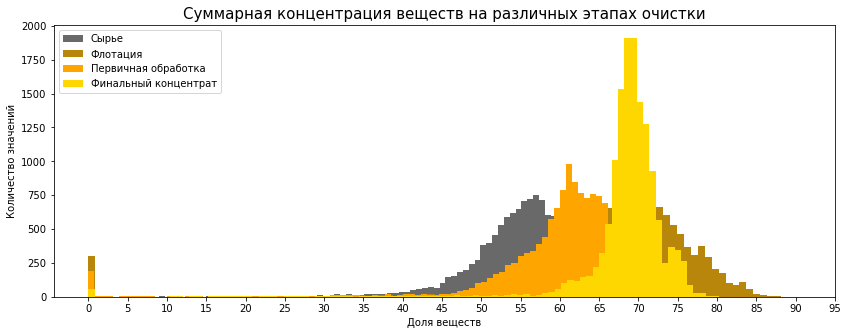

In [22]:
# построим график для наглядности
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot()

ax.hist(df['rougher.input.feed_sum'], color = 'dimgrey', bins=100)
ax.hist(df['rougher.output.concentrate_sum'], color = 'darkgoldenrod', bins=100)
ax.hist(df['primary_cleaner.output.concentrate_sum'], color = 'orange', bins=100)
ax.hist(df['final.output.concentrate_sum'], color = 'gold', bins=100)

ax.set_title('Суммарная концентрация веществ на различных этапах очистки', fontsize=15)
ax.set_xlabel('Доля веществ')
ax.set_ylabel('Количество значений')
ax.set_xticks(np.arange(0, 100, 5))

plt.legend(('Сырье', 'Флотация', 'Первичная обработка', 'Финальный концентрат'), loc = 'upper left')

plt.show()

In [23]:
train[df['primary_cleaner.output.concentrate_sum'] == 0].head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed_sum,rougher.output.concentrate_sum,primary_cleaner.output.concentrate_sum,final.output.concentrate_sum
19,2016-01-15 19:00:00,5.658943,10.436002,5.942418,42.509402,70.348300,10.232392,1.174845,19.498566,2.272460,...,10.032043,-499.128183,8.016140,-499.806844,13.949790,-600.140776,56.005644,62.930764,0.0,64.546766
22,2016-01-15 22:00:00,6.118749,10.483007,6.546983,41.406172,69.823900,10.322077,1.270956,19.384247,2.245145,...,9.985232,-499.796583,7.985524,-499.872153,13.973257,-600.054998,56.038252,62.225893,0.0,64.554911
30,2016-01-16 06:00:00,5.322681,9.577672,4.805490,44.059908,69.193840,10.334312,1.406355,19.923319,2.239310,...,9.969535,-499.350934,8.017975,-500.620850,11.999969,-600.315548,57.764677,62.283147,0.0,63.765751
71,2016-01-18 01:00:00,4.677499,11.304745,4.655438,45.135616,72.437752,10.525415,1.479372,19.364956,2.215637,...,10.025142,-499.554142,8.130711,-499.758800,11.951659,-600.726946,56.626743,61.183102,0.0,65.773298
74,2016-01-18 04:00:00,4.821388,10.235502,1.581066,43.264258,84.687443,5.520487,0.821232,9.264695,1.263480,...,10.012719,-501.020322,8.020406,-500.395112,11.995851,-598.774893,56.369424,60.301210,0.0,59.902215


В суммарном распределении веществ есть аномальные значения, равные 0. Возможно на данных очистках не замерялись доли полезных ископаемых или эти доли было настолько малы, что не было смысла их замерять. Удалим аномальные значения из таблицы.

In [24]:
train = train.loc[df['final.output.concentrate_sum'] != 0]
train = train.loc[df['primary_cleaner.output.concentrate_sum'] != 0]
train = train.loc[df['rougher.output.concentrate_sum'] != 0]
train = train.loc[df['rougher.input.feed_sum'] != 0]

**Вывод**

Данные проанализированны:
* Выявлено, что очистка золота происходит равномерно и эффективно с каждым этапом очистки доля золота в концентрате возрастает примерно на 10%; очистка серебра показывает отрицательный рост, возможно она происходит недостаточно эффективно; доля свинца после очистки увеличивается почти в три раза, однако вторичная очистка почти не дает результат
* Проанализировано распределение гранул сырья в обучающей и тестовой выборках - распределения схожи
* Исследована суммарная концентрация веществ после этапов очистки, выявлены и удалены аномальные значения

## Модель

### Предобработка данных

Проведем окончательную предобработку датасетов.

In [25]:
# удалим суммирование по этапам
train = train.drop(['rougher.input.feed_sum', 'rougher.output.concentrate_sum',
                    'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum'], axis=1)

In [26]:
# удалим промежуточные результаты
train = train.drop(dif, axis=1)


In [27]:
# чтобы объеденить столбцы из data и train, test, переведем дату в формат datetime
test['date'] = pd.to_datetime(test['date'],format='%Y.%m.%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'],format='%Y.%m.%d %H:%M:%S')

In [28]:
# добавим целевые признаки и расчетные характеристики
columns = ['final.output.recovery', 'rougher.output.recovery', 'date']
test = test.set_index('date')
train = train.set_index('date')
data = data.set_index('date')

In [29]:
test2 = pd.DataFrame(data, index=test.index, columns=columns)
test = test.merge(test2, on=test.index)

train2 = pd.DataFrame(data, index=train.index, columns=columns)
train = train.merge(train2, on=train.index)

In [30]:
# для обучения модели дата нам не понадобится, удалим в обучающей и тренировочной выборке.
train = train.drop(['key_0', 'date'], axis=1)
test = test.drop(['key_0', 'date'], axis=1)

Разделим обучающую и тестовую выборки.

In [31]:
# признаки тестовой выборки
features_test = test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']

# признаки обучающей выборки
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = train['rougher.output.recovery']
target_train_final = train['final.output.recovery']

### Функция для вычисления итоговой sMAPE

In [32]:
# напишем функцию для формулы smape = (1/N) * sum((|target - pred|) / ((|target| + |pred|) / 2)) * 100%
def smape(target, predictions):
    smape = (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)) * 100
    return smape.mean()


Проверим работу метрики SMAPE на линейной регрессии.

In [33]:
features_train_check, features_valid_check, target_train_check, target_valid_check = train_test_split(
    features_train, target_train_rougher, test_size=0.25, random_state=12345)

model = LinearRegression()
model.fit(features_train_check, target_train_check)
predictions = model.predict(features_valid_check)
print (smape(target_valid_check, predictions))

4.691581689629095


In [34]:
# напишем функцию для итоговой smape

def final_smape(rougher_smape, final_smape):
    return (0.25 * rougher_smape + 0.75 * final_smape)

### Обучение модели

**Дерево решений**

Обучим модель дерева решений и проведем кросс-валидацию с помощью GridSearch

In [35]:
# введем новую метрику и сделаем ее отрицательной
scoring = make_scorer(smape, greater_is_better=False)

In [36]:
# зададим параметры для модели

parameters_tree = { 'max_depth': range (1, 15, 2), 'random_state' : [12345] }
#parameters_forest = {'max_depth' : range (1, 6), 'random_state' : [12345]}


#parameters_tree = { 'max_depth': range (1,13, 2), 'min_samples_leaf' : range (1, 8), 'min_samples_split' : range (2, 10, 2)}
#parameters_forest = {'n_estimators' : range (10, 91, 10), 'max_depth' : range (1,13, 2), 'min_samples_leaf' : range (1,8),  'min_samples_split' : range (2,10,2), 'random_state' : [12345]}

In [37]:
# переберем гиперпараметры и проведем кросс-валидацию
model_tree = DecisionTreeRegressor()
model_forest = RandomForestRegressor()

grid_tree_rougher = GridSearchCV(model_tree, param_grid = parameters_tree, scoring = scoring)
grid_tree_final = GridSearchCV(model_tree, param_grid = parameters_tree, scoring = scoring)

#grid_forest_rougher = GridSearchCV(model_forest, param_grid = parameters_forest,  scoring = scoring)
#grid_forest_final = GridSearchCV(model_forest, param_grid = parameters_forest,  scoring = scoring)

In [38]:
# обучим модели
grid_tree_rougher.fit(features_train, target_train_rougher)
grid_tree_final.fit(features_train, target_train_final)

#grid_forest_rougher.fit(features_train, target_train_rougher)
#grid_forest_final.fit(features_train, target_train_final)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 15, 2), 'random_state': [12345]},
             scoring=make_scorer(smape, greater_is_better=False))

In [39]:
# определим лучшую модель

print ('По модели дерева решений лучший промежуточный результат: ', abs(grid_tree_rougher.best_score_))
print ('По модели дерева решений лучший финальный результат: ', abs(grid_tree_final.best_score_))

#print ('По модели случайного леса лучший промежуточный результат: ', grid_forest_rougher.best_score_)
#print ('По модели случайного леса лучший финальный результат: ', grid_forest_final.best_score_)

По модели дерева решений лучший промежуточный результат:  7.328567814752473
По модели дерева решений лучший финальный результат:  9.440354196471523


In [40]:
# найдем итоговую SMAPE
print ('Итоговая SMAPE: ', final_smape(abs(grid_tree_rougher.best_score_), abs(grid_tree_final.best_score_)))

Итоговая SMAPE:  8.91240760104176


**Случайный лес**

Для случайного леса создадим функцию, которая переберет параметры для двух целевых признаков и проведет кросс-валидацию

In [41]:
# напишем функцию для перебора параметров случайного леса

def model_score(features, target):
    
    best_model = 0
    best_score = -1000
    
    for depth in range(1, 10):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=10)
        scores = cross_val_score(model, features, target, cv=4,scoring = scoring)
               
        score = pd.Series(scores).mean()
        if score > best_score:
            best_score = score
            best_model = model
                
    return best_model, best_score

model_rouger, score_rougher = model_score(features_train, target_train_rougher)
model_final, score_final = model_score(features_train, target_train_final)

print ('Лучшая модель случайного леса для промежуточной оценки: ', model_rouger)
print ('Лучший SMAPE случайного леса для промежуточной оценки: ', abs(score_rougher))

print ('Лучшая модель случайного леса для финальной оценки: ', model_final)
print ('Лучший SMAPE случайного леса для финальной оценки: ', abs(score_final))

Лучшая модель случайного леса для промежуточной оценки:  RandomForestRegressor(max_depth=6, n_estimators=10, random_state=12345)
Лучший SMAPE случайного леса для промежуточной оценки:  7.763605674303934
Лучшая модель случайного леса для финальной оценки:  RandomForestRegressor(max_depth=2, n_estimators=10, random_state=12345)
Лучший SMAPE случайного леса для финальной оценки:  9.740247482444335


In [42]:
# найдем итоговую SMAPE
print ('Итоговая SMAPE: ', final_smape(abs(score_rougher), abs(score_final)))

Итоговая SMAPE:  9.246087030409235


**Линейная регрессия**

Также создадим функцию для обучения линейной регрессии и проведем кросс-валидацию.

In [43]:

def model_score(features, target):
    
    best_model = 0
    best_score = -1000
    
    model = LinearRegression()
    scores = cross_val_score(model, features, target, cv=4, scoring = scoring)
    
    score = pd.Series(scores).mean()
    if score > best_score:
        best_score = score
        best_model = model
                
    return best_model, best_score

model_rouger, score_rougher = model_score(features_train, target_train_rougher)
model_final, score_final = model_score(features_train, target_train_final)

print ('Лучшая модель линейной регрессии для промежуточной оценки: ', model_rouger)
print ('Лучший SMAPE линейной регрессии для промежуточной оценки: ', abs(score_rougher))

print ('Лучшая модель линейной регрессии для финальной оценки: ', model_final)
print ('Лучший SMAPE линейной регрессии для финальной оценки: ', abs(score_final))


Лучшая модель линейной регрессии для промежуточной оценки:  LinearRegression()
Лучший SMAPE линейной регрессии для промежуточной оценки:  7.741429931491362
Лучшая модель линейной регрессии для финальной оценки:  LinearRegression()
Лучший SMAPE линейной регрессии для финальной оценки:  10.87618173670366


In [44]:
# найдем итоговую SMAPE
print ('Итоговая SMAPE: ', final_smape(abs(score_rougher), abs(score_final)))

Итоговая SMAPE:  10.092493785400587


**Вывод**

Мы оценили несколько моделей с помощью кросс-валидации. Наиболее эффективная модель оценки - Линейная регрессия.

###  Тестирование модели

Проверим модель на тестовой выборке

In [45]:
model_rougher = LinearRegression()
model_rougher.fit(features_train, target_train_rougher)
predictions_rougher = model_rougher.predict(features_test)

rougher_score = smape(target_test_rougher, predictions_rougher)
rougher_score

8.56072796798345

In [46]:
model_final = LinearRegression()
model_final.fit(features_train, target_train_final)
predictions_final = model_final.predict(features_test)

final_score = smape(target_test_final, predictions_final)
final_score

9.603329891239747

In [47]:
print ('Итоговая SMAPE: ', final_smape(abs(rougher_score), abs(final_score)))

Итоговая SMAPE:  9.342679410425674


Проверим модель на адекватность - сравним с константной моделью `DummyRegressor`

In [48]:
model = DummyRegressor(strategy = 'mean')
model.fit(features_train, target_train_rougher)
predictions_rougher = model.predict(features_test)

rougher_score = smape(target_test_rougher, predictions_rougher)
rougher_score

9.064360592154223

In [49]:
model = DummyRegressor(strategy = 'mean')
model.fit(features_train, target_train_final)
predictions_final = model.predict(features_test)

final_score = smape(target_test_final, predictions_final)
final_score

10.086634972028302

In [50]:
print ('Итоговая SMAPE: ', final_smape(abs(rougher_score), abs(final_score)))

Итоговая SMAPE:  9.831066377059782


**Вывод**

Задача проекта - смоделировать процесс восстановления золота из золотосодержащей руды выполнена.

В исследовании были выполнены следующие шаги:
1. Подготовлены данные:
    * Изучены датасеты
    * Проведена проверка на корректность данных
    * Проанализированны признаки
    * Проведена предобработка
2. Проведен исследовательский анализ:
    * Проанализирована концентрация металлов, выявлена недостаточная эффективность очистки серебра и свинца
    * Проведен сравнительный анализ распределения гранул сырья
    * Удалены аномальные значения
3. Обучение модели:
    * Обучено несколько моделей
    * Оценено качество моделей и выбрана наиболее эффективная модель 
    * Проведена кросс-валидация
    * Лучшая модель протестирована

Наиболее эффективная модель - Случайный лес, с помощью него можно сделать предсказания эффективности восстановления золота.